In [ ]:
from numpy.random import seed
seed(0xdeadbeef)
import tensorflow as tf
tf.random.set_seed(0xdeadbeef)
from tensorflow import keras
imdb = keras.datasets.imdb
num_words = 20000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(seed=1, num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data[0])
print('label:', train_labels[0])

[1, 13, 28, 1039, 7, 14, 23, 1856, 13, 104, 36, 4, 699, 8060, 144, 297, 14, 175, 291, 18, 4, 375, 1784, 153, 38, 15, 75, 92, 859, 51, 16, 5, 15, 75, 377, 24, 8, 81, 4, 172, 2497, 174, 40, 1489, 49, 84, 11, 4, 2030, 3039, 121, 36, 92, 4881, 14, 20, 2, 9, 40, 6, 2, 621, 18, 148, 37, 191, 1941, 42, 511, 14, 20, 9, 17, 76, 253, 17, 269, 8, 3336, 4, 2, 8, 1278, 6, 543, 2647, 10, 10, 308, 3102, 2, 47, 43, 188, 46, 7, 1172, 5, 240, 2854, 145, 8, 4, 154, 3243, 11, 4819, 58, 18, 35, 32, 8, 327, 823, 7, 7350, 7, 265, 308, 1828, 145, 1646, 4, 154, 890, 5, 9, 14412, 34, 362, 2515, 154, 1914, 5, 27, 15227, 2, 17, 36, 837, 5, 1941, 32, 367, 4, 96, 10, 10, 13, 62, 386, 14, 48, 13, 16, 3178, 42, 48, 11, 882, 294, 16, 3412, 2, 4360, 2, 34, 6, 1042, 18, 2, 345, 96, 14, 9, 6, 862, 526, 3757, 917, 5, 60, 1055, 13, 115, 197, 474, 1829, 15, 2006, 7, 6791, 113, 19, 4, 2, 261, 13, 104, 4, 1653, 173, 7, 4, 65, 143, 4, 3801, 1366, 548, 844, 5, 4, 837, 1396, 27, 369, 459, 44, 68, 4731, 5, 181, 8, 607, 4, 6791, 3

In [ ]:
# A dictionary mapping words to an integer index
vocabulary = imdb.get_word_index()

# The first indices are reserved
vocabulary = {k:(v+3) for k,v in vocabulary.items()}
vocabulary["<PAD>"] = 0
# See how integer 1 appears first in the review above.
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2  # unknown
vocabulary["<UNUSED>"] = 3

# reversing the vocabulary.
# in the index, the key is an integer,
# and the value is the corresponding word.
index = dict([(value, key) for (key, value) in vocabulary.items()])

def decode_review(text):
    '''converts encoded text to human readable form.
    each integer in the text is looked up in the index, and
    replaced by the corresponding word.
    '''
    return ' '.join([index.get(i, '?') for i in text])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decode_review(train_data[0])

"<START> i have copy of this on vhs i think they the television networks should play this every year for the next twenty years so that we don't forget what was and that we remember not to do the same mistakes again like putting some people in the director's chair where they don't belong this movie <UNK> is like a <UNK> musical for those who can't sing or act this movie is as much fun as trying to teach the <UNK> to drive a city bus br br john hood <UNK> has just got out of prison and he's headed back to the old neighborhood in serving time for an all to nice crime of necessity of course john heads back onto the old street and is greeted by kids dogs old ladies and his peer <UNK> as they dance and sing all along the way br br i would recommend this if i was sentimental or if in truth someone was smoking <UNK> pot <UNK> by a doctor for <UNK> either way this is a poorly directed scripted acted and even produced i never thought i'd sat that satire of ghetto life with the <UNK> although i t

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=vocabulary["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=vocabulary["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
train_data[1]

array([    1,   103,   450,   576,    73,  2896,     8,     4,   213,
           7,   897,    13,    16,   576,  3521,    19,     4,    22,
           4,    22,    16,   465,   728,     4,  2563,     4,  1460,
           4,  3237,     5,     6,    55,   576,  1078,  2734,    10,
          10,    13,    69,  2721,   873,     8,    67,   111,   318,
         302,     5,    40,     6, 13892,     2,    12,  4280,    72,
         245,    19,     4,  4211,     5,     4,     2,     7,    12,
        1620,    13,   244,   174,  2654,   245,    19,   129,  7102,
          19,     4,   979,     7,     4,    65,     5,   129,   459,
           7,     4,   318,   302,    25,    80,   140,     6,   196,
          96,    61,   464,    13,    80,   407,    30,     4,  2217,
           7,   129,   337,  1333,    10,    10,  2127,     2,     4,
         118,   284,  1344,    16,     4,   612,    31,  1099,    25,
          93,  1792,  7606,   168,    40,     6,   506,  1079,     8,
           2,    10,

In [ ]:
model = keras.Sequential()

# the first layer is the embedding layer.
# we indicate the number of possible words,
# the dimension of the embedding space,
# and the maximum size of the text.
model.add(keras.layers.Embedding(len(vocabulary), 2, input_length=256))

# the output of the embedding is multidimensional,
# with shape (256, 2)
# for each word, we obtain two values,
# the x and y coordinates
# we flatten this output to be able to
# use it in a dense layer
model.add(keras.layers.Flatten())

# dropout regularization
model.add(keras.layers.Dropout(rate=0.5))

# small dense layer. It's role is to analyze
# the distribution of points from embedding
model.add(keras.layers.Dense(5))

# final neuron, with sigmoid activation
# for binary classification
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 2)            177176    
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 179,747
Trainable params: 179,747
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,
                    train_labels,
                    epochs=5,
                    batch_size=100,
                    validation_data=(test_data, test_labels),
                    verbose=1)

Epoch 1/5
250/250 [==============================] - 4s 11ms/step - loss: 0.6810 - accuracy: 0.5607 - val_loss: 0.6160 - val_accuracy: 0.7254
Epoch 2/5
250/250 [==============================] - 4s 15ms/step - loss: 0.4550 - accuracy: 0.7995 - val_loss: 0.3508 - val_accuracy: 0.8612
Epoch 3/5
250/250 [==============================] - 3s 11ms/step - loss: 0.3121 - accuracy: 0.8700 - val_loss: 0.3034 - val_accuracy: 0.8774
Epoch 4/5
250/250 [==============================] - 3s 11ms/step - loss: 0.2561 - accuracy: 0.8975 - val_loss: 0.2876 - val_accuracy: 0.8820
Epoch 5/5
250/250 [==============================] - 4s 17ms/step - loss: 0.2252 - accuracy: 0.9101 - val_loss: 0.2878 - val_accuracy: 0.8803


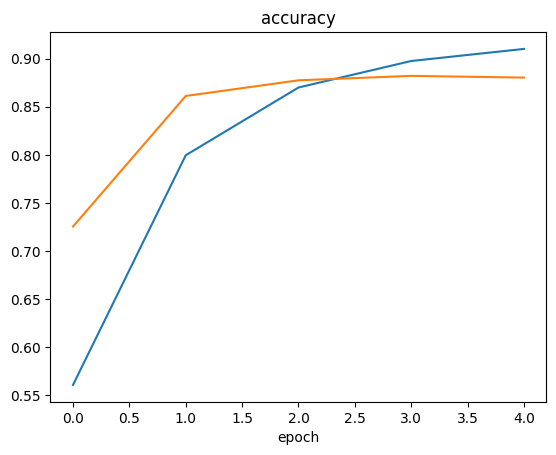

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(history, miny=None):
  acc = history.history['accuracy']
  test_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy')
  plt.xlabel('epoch')
  plt.figure()
plot_accuracy(history)

In [ ]:
# with a Sequential model
get_embed_out = keras.backend.function(
    [model.layers[0].input],
    [model.layers[1].output])

In [ ]:
layer_output = get_embed_out([test_data[0]])
print(type(layer_output), len(layer_output), layer_output[0].shape)

<class 'list'> 1 (256, 2)


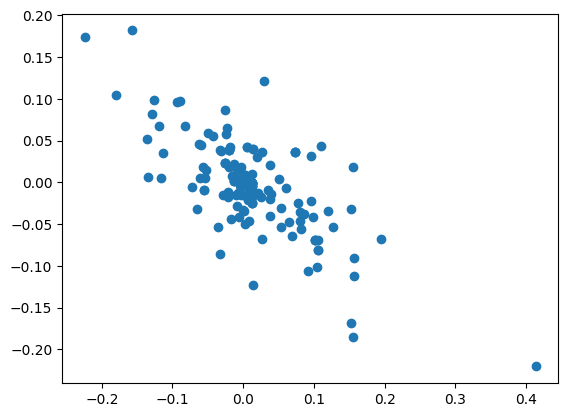

In [ ]:
words = layer_output[0]
plt.scatter(words[:,0], words[:,1])

In [ ]:
review = ['great', 'brilliant','crap','bad',
          'fantastic', 'movie', 'seagal']
enc_review = tf.constant([vocabulary[word] for word in review])
enc_review

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([  87,  530,  595,   78,  777,   20, 3272], dtype=int32)>

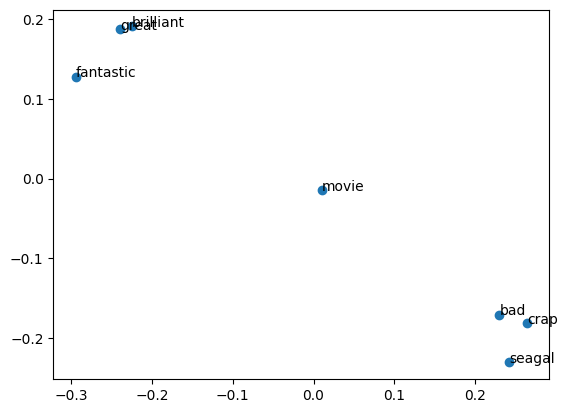

In [ ]:
words = get_embed_out([enc_review])[0]
plt.scatter(words[:,0], words[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (words[i,0], words[i,1]))

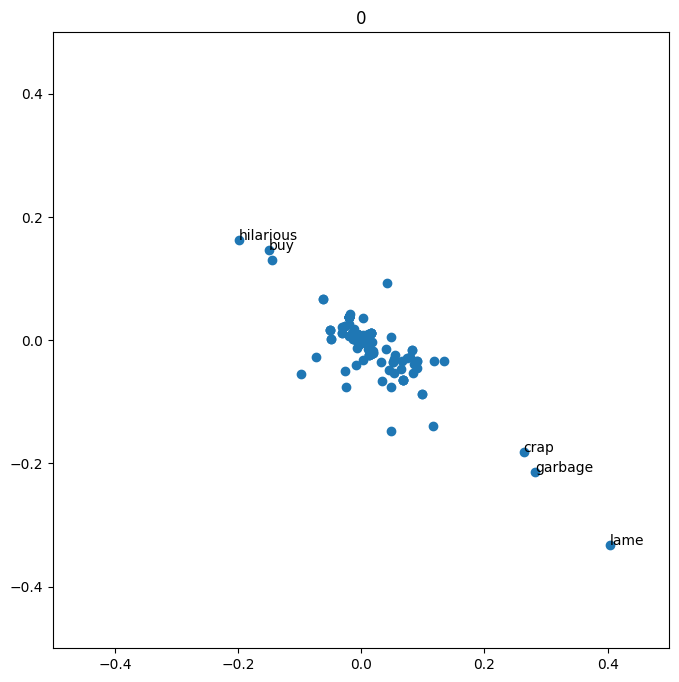

In [ ]:
import math
def plot_review(i):
    # plot the distribution of points
    enc_words = test_data[i]
    emb_words = get_embed_out([enc_words])[0]
    plt.figure(figsize=(8,8))
    plt.scatter(emb_words[:,0], emb_words[:,1])
    # use the label as title: 1 is positive,
    # 0 is negative
    plt.title(test_labels[i])
    # for words that are far enough from (0,0),
    # print the word
    for i, (enc_word, emb_word) in enumerate(zip(enc_words, emb_words)):
        word = index[enc_word]
        x, y = emb_word
        if math.sqrt(x**2 + y**2)>0.2:
            plt.annotate(word, (x, y))
    # fix the range in x and y to be able to compare
    # the distributions of different reviews
    axes = plt.gca()
    axes.set_xlim([-0.5,0.5])
    axes.set_ylim([-0.5, 0.5])
    axes.set_aspect('equal', adjustable='box')
plot_review(15)

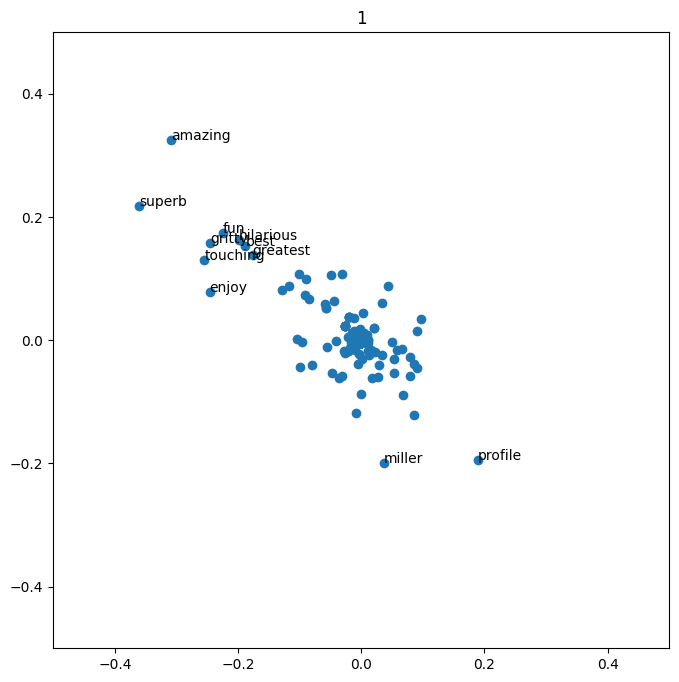

In [ ]:
plot_review(17)